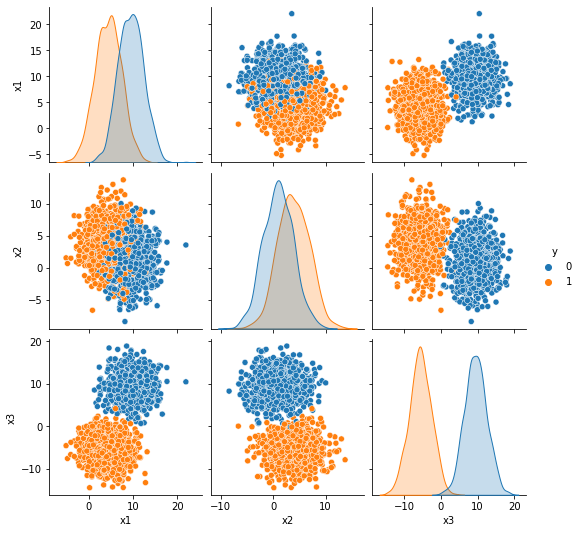

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import seaborn as sns

# Generate blobs dataset
nd = 3
features, label = make_blobs(n_samples=2000, centers=2,\
                             n_features=nd, random_state=4,\
                             cluster_std=3) 
data = pd.DataFrame()
data['x1'] = features[:,0]
data['x2'] = features[:,1]
data['x3'] = features[:,2]
data['y']  = label

sns.pairplot(data,hue='y')

In [74]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data.values,test_size=0.2)

In [75]:
from math import exp
def predict(row,beta):
    x = row[0:-1]
    yhat = beta[0]
    for i,xi in enumerate(x):
        yhat += beta[i+1]*xi
    return 1.0/(1.0+exp(-yhat))

In [76]:
l_rate = 0.3
n_epochs = 100

loss = np.zeros(n_epochs)
beta = [0.0]*(nd+1)
for epoch in range(n_epochs):
    sum_error = 0
    for row in train:
        x = row[0:-1]
        y = row[-1]
        yhat = predict(row,beta)
        error = y-yhat
        sum_error += error**2
        beta[0] += l_rate * error * yhat * (1-yhat)
        for i in range(nd):
            beta[i+1] += l_rate * error * yhat * (1-yhat) * x[i]
    loss[epoch] = sum_error

In [77]:
print(beta)

[5.94629034792961, 0.06726441141465907, 1.2039364859972053, -4.378990599532581]


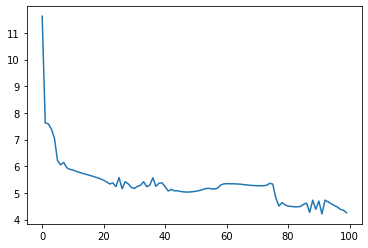

In [78]:
plt.plot(loss)

In [79]:
yhat = []
for row in test:
    yhat.append(round(predict(row,beta)))

<AxesSubplot:>

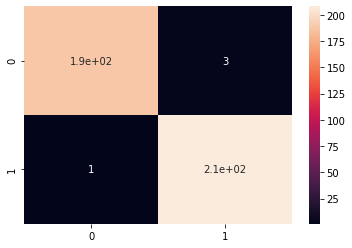

In [80]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(test[:,-1],yhat)
sns.heatmap(cmat,annot=True)